In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('sign_mnist_train.csv') # Since train data is too large to put it into Github, it is recommended to download it and save it in workplace.
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [6]:
y_train = data['label']

X_train = data.drop(columns = 'label')

In [7]:
np.unique(y_train)
one_hot_enc_y_train = tf.keras.utils.to_categorical(y_train)
one_hot_enc_y_train.shape

(27455, 25)

In [8]:

np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [9]:
test = pd.read_csv('sign_mnist_test.csv') # Since train data is too large to put it into Github, it is recommended to download it and save it in workplace.
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [10]:
y_test = test['label']
X_test = test.drop(columns = 'label')

In [11]:
from tensorflow.keras import layers, models

In [12]:
# Normalize the data
X_train /= 255.0
X_test /= 255.0

In [13]:
X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [14]:
model_l2 = models.Sequential();
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_l2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [15]:
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_l2.add(layers.Dense(25, kernel_regularizer='l2'))

In [16]:
model_l2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [17]:
model_l2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_l2.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 15s 5ms/step - loss: 1.6500 - accuracy: 0.5608 - val_loss: 0.8702 - val_accuracy: 0.7784
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.4490 - accuracy: 0.9342 - val_loss: 0.6378 - val_accuracy: 0.8716
Epoch 3/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2785 - accuracy: 0.9810 - val_loss: 0.5546 - val_accuracy: 0.8972
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2174 - accuracy: 0.9882 - val_loss: 0.4791 - val_accuracy: 0.9109
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1820 - accuracy: 0.9894 - val_loss: 0.6544 - val_accuracy: 0.8311
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.1672 - accuracy: 0.9897 - val_loss: 0.4100 - val_accuracy: 0.9197
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1368 - accuracy: 0.9911 - val_loss: 0.3597 - val_accuracy: 0.9354
Epoch

225/225 - 0s - loss: 0.4288 - accuracy: 0.9039 - 475ms/epoch - 2ms/step


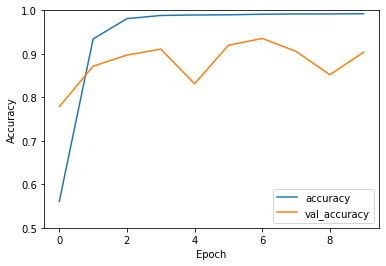

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_l2.evaluate(X_test,  y_test, verbose=2)

In [19]:
print(test_acc)

0.9039319753646851


In [20]:
model_es = models.Sequential();
model_es.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_es.add(layers.MaxPooling2D((2, 2)))
model_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_es.add(layers.MaxPooling2D((2, 2)))
model_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_es.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [21]:
model_es.add(layers.Flatten())
model_es.add(layers.Dense(64, activation='relu'))
model_es.add(layers.Dense(25))

In [22]:
model_es.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [23]:
model_es.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_es.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 4s 4ms/step - loss: 1.0983 - accuracy: 0.6628 - val_loss: 0.5855 - val_accuracy: 0.8203
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0846 - accuracy: 0.9779 - val_loss: 0.5160 - val_accuracy: 0.8752
Epoch 3/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0225 - accuracy: 0.9949 - val_loss: 0.5077 - val_accuracy: 0.8875
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0302 - accuracy: 0.9907 - val_loss: 0.6165 - val_accuracy: 0.8550
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.5588 - val_accuracy: 0.9042
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.6700 - val_accuracy: 0.8311
Epoch 6: early stopping


225/225 - 0s - loss: 0.6700 - accuracy: 0.8311 - 445ms/epoch - 2ms/step


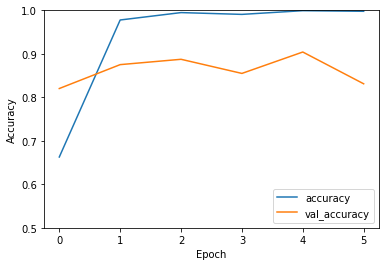

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_es.evaluate(X_test,  y_test, verbose=2)

In [25]:
print(test_acc)

0.8311489224433899


In [26]:
model_dropout = models.Sequential();
model_dropout.add(layers.Conv2D(5, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout.add(layers.Dropout(0.2))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_dropout.add(layers.Dropout(0.2))
model_dropout.add(layers.MaxPooling2D((2, 2)))
model_dropout.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dropout.add(layers.Dropout(0.2))
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 dropout (Dropout)           (None, 26, 26, 5)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        1472      
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

In [27]:
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(64, activation='relu'))
model_dropout.add(layers.Dense(25))

In [28]:
model_dropout.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 5)         50        
                                                                 
 dropout (Dropout)           (None, 26, 26, 5)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 5)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        1472      
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

In [29]:
model_dropout.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model_dropout.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
858/858 [==============================] - 5s 5ms/step - loss: 1.3619 - accuracy: 0.5738 - val_loss: 0.8398 - val_accuracy: 0.7213
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3049 - accuracy: 0.8977 - val_loss: 0.4438 - val_accuracy: 0.8707
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.1374 - accuracy: 0.9549 - val_loss: 0.2869 - val_accuracy: 0.9094
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0868 - accuracy: 0.9712 - val_loss: 0.3086 - val_accuracy: 0.9077
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0600 - accuracy: 0.9809 - val_loss: 0.2867 - val_accuracy: 0.9020
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.2491 - val_accuracy: 0.9200
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.0397 - accuracy: 0.9874 - val_loss: 0.2838 - val_accuracy: 0.9274
Epoch 

225/225 - 0s - loss: 0.2505 - accuracy: 0.9158 - 409ms/epoch - 2ms/step


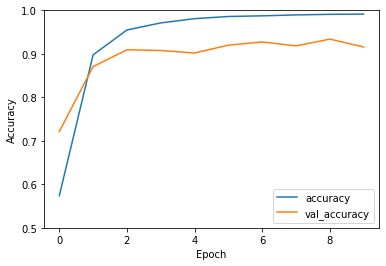

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_dropout.evaluate(X_test,  y_test, verbose=2)

In [31]:
print(test_acc)

0.9157835841178894


Models below are variations of the original model with different number of layers and hyperparameters:

In [32]:
# This model has an extra maxpooling layer
model_3_max_pool = models.Sequential();
model_3_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [33]:
model_3_max_pool.add(layers.Flatten())
model_3_max_pool.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_3_max_pool.add(layers.Dense(25, kernel_regularizer='l2'))

In [34]:
model_3_max_pool.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [35]:
model_3_max_pool.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_3_max_pool.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 6s 6ms/step - loss: 1.9587 - accuracy: 0.4537 - val_loss: 1.1584 - val_accuracy: 0.6615
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.7480 - accuracy: 0.8208 - val_loss: 0.8590 - val_accuracy: 0.7433
Epoch 3/10
858/858 [==============================] - 4s 5ms/step - loss: 0.4837 - accuracy: 0.9124 - val_loss: 0.7609 - val_accuracy: 0.8047
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3430 - accuracy: 0.9576 - val_loss: 0.6858 - val_accuracy: 0.8298
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2581 - accuracy: 0.9815 - val_loss: 0.6767 - val_accuracy: 0.8497
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2169 - accuracy: 0.9861 - val_loss: 0.6600 - val_accuracy: 0.8461
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1809 - accuracy: 0.9902 - val_loss: 0.6445 - val_accuracy: 0.8528
Epoch 

225/225 - 0s - loss: 0.5612 - accuracy: 0.8649 - 483ms/epoch - 2ms/step


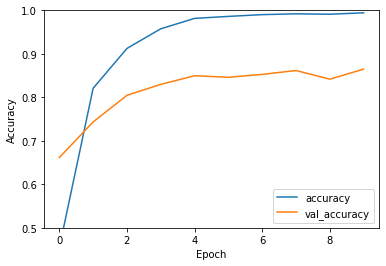

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_3_max_pool.evaluate(X_test,  y_test, verbose=2)

In [37]:
print(test_acc)

0.8648912310600281


In [37]:
# This model has an extra maxpooling layer
model_3_max_pool = models.Sequential();
model_3_max_pool.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_3_max_pool.add(layers.MaxPooling2D((2, 2)))
model_3_max_pool.summary()

In [38]:
# 1 convoluted layer only
model_1_conv_layers = models.Sequential();
model_1_conv_layers.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_1_conv_layers.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [40]:
model_1_conv_layers.add(layers.Flatten())
model_1_conv_layers.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
model_1_conv_layers.add(layers.Dense(25, kernel_regularizer='l2'))

In [41]:
model_1_conv_layers.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 flatten_5 (Flatten)         (None, 21632)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1384512   
                                                                 
 dense_11 (Dense)            (None, 25)                1625      
                                                                 
Total params: 1,386,457
Trainable params: 1,386,457
Non-trainable params: 0
_________________________________________________________________


In [42]:
model_1_conv_layers.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

history = model_1_conv_layers.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/10
858/858 [==============================] - 4s 4ms/step - loss: 2.3849 - accuracy: 0.3621 - val_loss: 2.0226 - val_accuracy: 0.4704
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 1.5374 - accuracy: 0.6112 - val_loss: 1.7570 - val_accuracy: 0.5791
Epoch 3/10
858/858 [==============================] - 3s 3ms/step - loss: 1.3297 - accuracy: 0.6833 - val_loss: 1.6527 - val_accuracy: 0.5817
Epoch 4/10
858/858 [==============================] - 3s 3ms/step - loss: 1.2134 - accuracy: 0.7298 - val_loss: 1.5673 - val_accuracy: 0.6341
Epoch 5/10
858/858 [==============================] - 3s 3ms/step - loss: 1.1329 - accuracy: 0.7637 - val_loss: 1.5421 - val_accuracy: 0.6308
Epoch 6/10
858/858 [==============================] - 3s 3ms/step - loss: 1.0429 - accuracy: 0.8019 - val_loss: 1.4877 - val_accuracy: 0.6642
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.9949 - accuracy: 0.8181 - val_loss: 1.3810 - val_accuracy: 0.6810
Epoch 

225/225 - 1s - loss: 1.4610 - accuracy: 0.6637 - 774ms/epoch - 3ms/step


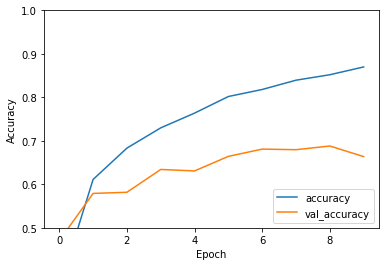

In [44]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_1_conv_layers.evaluate(X_test,  y_test, verbose=2)

In [79]:
def run_model(model):
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer='l2'))
    model.add(layers.Dense(25, activation='softmax', kernel_regularizer='l2'))

    model.summary()

    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es])

    plot_accuracy(model, history)

    test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

    print(f'Test accuracy: {test_acc}')

def plot_accuracy(model, history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 5408)              0         
                                                                 
 dense_56 (Dense)            (None, 64)                346176    
                                                                 
 dense_57 (Dense)            (None, 25)                1625      
                                                                 
Total params: 348,121
Trainable params: 348,121
Non-trainable params: 0
_______________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 4s 4ms/step - loss: 2.3349 - accuracy: 0.4268 - val_loss: 1.8241 - val_accuracy: 0.5805
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 1.4367 - accuracy: 0.7076 - val_loss: 1.5905 - val_accuracy: 0.6450
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 1.2111 - accuracy: 0.7862 - val_loss: 1.5314 - val_accuracy: 0.6592
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 1.0641 - accuracy: 0.8390 - val_loss: 1.4500 - val_accuracy: 0.6916
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.9763 - accuracy: 0.8689 - val_loss: 1.4530 - val_accuracy: 0.6985
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.9031 - accuracy: 0.8924 - val_loss: 1.2543 - val_accuracy: 0.7443
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.8418 - accuracy: 0.9101 - val_loss: 1.3534 - val_accuracy: 0.7103
Epoch 8/10
858/85

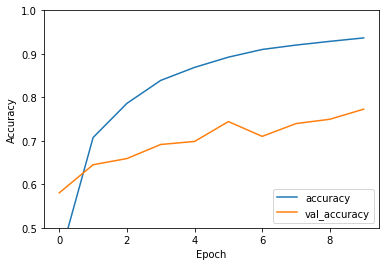

In [80]:
# 1 convoluted and 1 maxpool layer
model_2 = models.Sequential();
model_2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))
run_model(model_2)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 flatten_29 (Flatten)        (None, 7744)              0         
                                                                 
 dense_58 (Dense)            (None, 64)                495680    
                                                                 
 dense_59 (Dense)            (None, 25)                1625      
                                                     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 4s 4ms/step - loss: 1.4420 - accuracy: 0.6982 - val_loss: 1.0096 - val_accuracy: 0.7943
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.6038 - accuracy: 0.9350 - val_loss: 0.9186 - val_accuracy: 0.8123
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.4616 - accuracy: 0.9624 - val_loss: 0.8176 - val_accuracy: 0.8311
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.3915 - accuracy: 0.9722 - val_loss: 0.7364 - val_accuracy: 0.8498
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3540 - accuracy: 0.9763 - val_loss: 0.7716 - val_accuracy: 0.8454
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3198 - accuracy: 0.9798 - val_loss: 0.7153 - val_accuracy: 0.8543
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.3011 - accuracy: 0.9814 - val_loss: 0.6360 - val_accuracy: 0.8652
Epoch 8/10
858/85

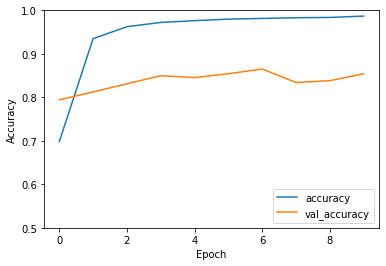

In [81]:
# 2 convoluted and 1 maxpool layer
model_3 = models.Sequential();
model_3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))
model_3.add(layers.Conv2D(64, (3, 3), activation='relu'))

run_model(model_3)

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 1600)              0         
                                                                 
 dense_60 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 4s 4ms/step - loss: 1.5799 - accuracy: 0.6322 - val_loss: 1.0051 - val_accuracy: 0.7851
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 0.5462 - accuracy: 0.9411 - val_loss: 0.7052 - val_accuracy: 0.8724
Epoch 3/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3737 - accuracy: 0.9783 - val_loss: 0.6386 - val_accuracy: 0.8615
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2968 - accuracy: 0.9865 - val_loss: 0.5050 - val_accuracy: 0.9031
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2623 - accuracy: 0.9873 - val_loss: 0.6144 - val_accuracy: 0.8763
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2371 - accuracy: 0.9879 - val_loss: 0.5253 - val_accuracy: 0.8801
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2177 - accuracy: 0.9894 - val_loss: 0.4643 - val_accuracy: 0.9071
Epoch 8/10
858/85

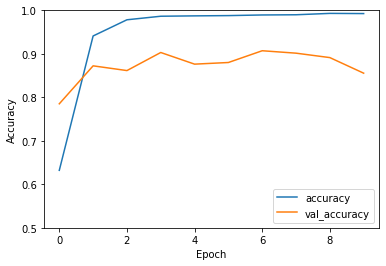

In [82]:
# 2 convoluted and 2 maxpool layer
model_4 = models.Sequential();
model_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))
model_4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

run_model(model_4)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_31 (Flatten)        (None, 576)             

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 4s 5ms/step - loss: 1.5442 - accuracy: 0.6166 - val_loss: 0.8468 - val_accuracy: 0.8031
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 0.4336 - accuracy: 0.9507 - val_loss: 0.6914 - val_accuracy: 0.8614
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2825 - accuracy: 0.9811 - val_loss: 0.6044 - val_accuracy: 0.8652
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2207 - accuracy: 0.9877 - val_loss: 0.4442 - val_accuracy: 0.9152
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1818 - accuracy: 0.9900 - val_loss: 0.4844 - val_accuracy: 0.8974
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1659 - accuracy: 0.9883 - val_loss: 0.3607 - val_accuracy: 0.9223
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1315 - accuracy: 0.9928 - val_loss: 0.4071 - val_accuracy: 0.9060
Epoch 8/10
858/85

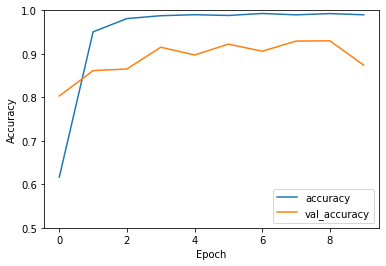

In [83]:
# 3 convoluted and 2 maxpool layer
model_5 = models.Sequential();
model_5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_5.add(layers.MaxPooling2D((2, 2)))
model_5.add(layers.Conv2D(64, (3, 3), activation='relu'))


run_model(model_5)

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_79 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_80 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 1, 1, 64)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 5s 6ms/step - loss: 2.1643 - accuracy: 0.3787 - val_loss: 1.3956 - val_accuracy: 0.6185
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 0.8443 - accuracy: 0.7836 - val_loss: 1.0514 - val_accuracy: 0.7144
Epoch 3/10
858/858 [==============================] - 4s 4ms/step - loss: 0.5395 - accuracy: 0.8966 - val_loss: 0.8481 - val_accuracy: 0.7878
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3685 - accuracy: 0.9524 - val_loss: 0.8318 - val_accuracy: 0.7945
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2810 - accuracy: 0.9770 - val_loss: 0.7339 - val_accuracy: 0.8508
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2253 - accuracy: 0.9881 - val_loss: 0.7757 - val_accuracy: 0.8328
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.1883 - accuracy: 0.9912 - val_loss: 0.8143 - val_accuracy: 0.8236
Epoch 8/10
858/85

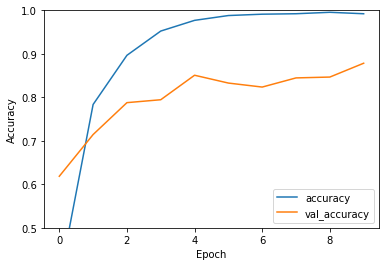

In [84]:
# 3 convoluted and 3 maxpool layer
model_6 = models.Sequential();
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))
model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))


run_model(model_6)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 18, 18, 32)        3904      
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_83 (Conv2D)          (None, 1, 1, 64)          165952    
                                                                 
 flatten_33 (Flatten)        (None, 64)                0         
                                                                 
 dense_66 (Dense)            (None, 64)                4160      
                                                                 
 dense_67 (Dense)            (None, 25)                1625      
                                                     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 4s 4ms/step - loss: 2.1753 - accuracy: 0.3802 - val_loss: 1.5651 - val_accuracy: 0.5333
Epoch 2/10
858/858 [==============================] - 4s 4ms/step - loss: 1.1513 - accuracy: 0.6812 - val_loss: 1.2078 - val_accuracy: 0.6564
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.8043 - accuracy: 0.8099 - val_loss: 0.9942 - val_accuracy: 0.7407
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.6058 - accuracy: 0.8827 - val_loss: 0.8921 - val_accuracy: 0.7975
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.4837 - accuracy: 0.9278 - val_loss: 0.9047 - val_accuracy: 0.7691
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.4039 - accuracy: 0.9526 - val_loss: 0.8616 - val_accuracy: 0.7903
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3495 - accuracy: 0.9716 - val_loss: 0.8476 - val_accuracy: 0.8120
Epoch 8/10
858/85

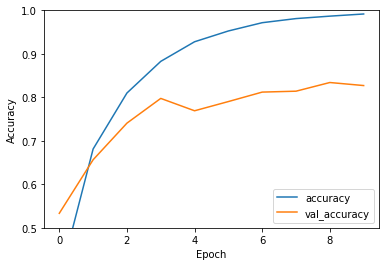

In [85]:
# 2 convoluted and 1 maxpool layer, Kernel size: (11,11), (9,9)
model_7 = models.Sequential();
model_7.add(layers.Conv2D(32, (11, 11), activation='relu', input_shape=(28, 28, 1)))
model_7.add(layers.MaxPooling2D((2, 2)))
model_7.add(layers.Conv2D(64, (9, 9), activation='relu'))

run_model(model_7)

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_84 (Conv2D)          (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 3, 3, 64)          165952    
                                                                 
 flatten_34 (Flatten)        (None, 576)               0         
                                                                 
 dense_68 (Dense)            (None, 64)                36928     
                                                                 
 dense_69 (Dense)            (None, 25)                1625      
                                                     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 5s 5ms/step - loss: 1.5543 - accuracy: 0.6309 - val_loss: 1.0242 - val_accuracy: 0.7637
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 0.5317 - accuracy: 0.9370 - val_loss: 0.7678 - val_accuracy: 0.8390
Epoch 3/10
858/858 [==============================] - 4s 4ms/step - loss: 0.3421 - accuracy: 0.9836 - val_loss: 0.6175 - val_accuracy: 0.8799
Epoch 4/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2636 - accuracy: 0.9903 - val_loss: 0.5621 - val_accuracy: 0.8799
Epoch 5/10
858/858 [==============================] - 4s 4ms/step - loss: 0.2159 - accuracy: 0.9927 - val_loss: 0.6157 - val_accuracy: 0.8490
Epoch 6/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1929 - accuracy: 0.9923 - val_loss: 0.4719 - val_accuracy: 0.8997
Epoch 7/10
858/858 [==============================] - 4s 4ms/step - loss: 0.1644 - accuracy: 0.9934 - val_loss: 0.5110 - val_accuracy: 0.8734
Epoch 8/10
858/85

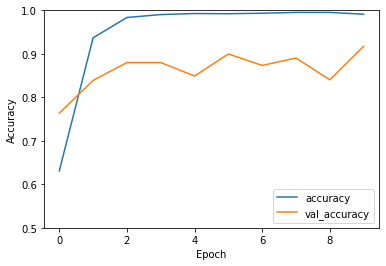

In [86]:
# 2 convoluted and 1 maxpool layer, Kernel sizes: (7,7), (9,9)
model_8 = models.Sequential();
model_8.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model_8.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (9, 9), activation='relu'))

run_model(model_8)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_86 (Conv2D)          (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 11, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 3, 3, 64)          165952    
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 1, 1, 64)         0         
 g2D)                                                            
                                                                 
 flatten_35 (Flatten)        (None, 64)                0         
                                                                 
 dense_70 (Dense)            (None, 64)              

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


858/858 [==============================] - 5s 5ms/step - loss: 1.8255 - accuracy: 0.5072 - val_loss: 1.2034 - val_accuracy: 0.7059
Epoch 2/10
858/858 [==============================] - 3s 4ms/step - loss: 0.6964 - accuracy: 0.8687 - val_loss: 0.9131 - val_accuracy: 0.7609
Epoch 3/10
858/858 [==============================] - 3s 4ms/step - loss: 0.4362 - accuracy: 0.9571 - val_loss: 0.7842 - val_accuracy: 0.8122
Epoch 4/10
858/858 [==============================] - 3s 4ms/step - loss: 0.3217 - accuracy: 0.9879 - val_loss: 0.7224 - val_accuracy: 0.8133
Epoch 5/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2617 - accuracy: 0.9948 - val_loss: 0.6445 - val_accuracy: 0.8373
Epoch 6/10
858/858 [==============================] - 3s 4ms/step - loss: 0.2180 - accuracy: 0.9976 - val_loss: 0.6078 - val_accuracy: 0.8557
Epoch 7/10
858/858 [==============================] - 3s 4ms/step - loss: 0.1877 - accuracy: 0.9978 - val_loss: 0.5846 - val_accuracy: 0.8529
Epoch 8/10
858/85

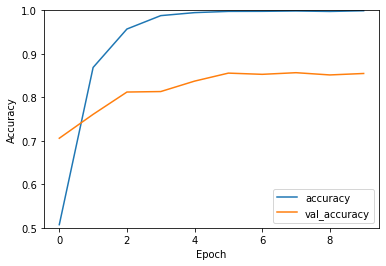

In [87]:
# 2 convoluted and 1 maxpool layer, Kernel sizes: (7,7), (9,9)
model_9 = models.Sequential();
model_9.add(layers.Conv2D(32, (7, 7), activation='relu', input_shape=(28, 28, 1)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (9, 9), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))


run_model(model_9)